In [2]:
# Create figures in Python that handle LaTeX, and save images to files in my
# preferred formatting. I typically place this code in the root of each of my
# projects, and import using:
# from latexify import *
# which will also run the latexify() function on the import.

# Based on code from https://nipunbatra.github.io/blog/2014/latexify.html

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

#Back-end to use depends on the system
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('ps', FigureCanvasPgf)

import seaborn as sns
sns.set_style("white")

#my preferred palette. From
#https://seaborn.pydata.org/tutorial/color_palettes.html: "The cubehelix color
#palette system makes sequential palettes with a linear increase or decrease in
#brightness and some variation in hue. This means that the information in your
#colormap will be preserved when converted to black and white (for printing) or
#when viewed by a colorblind individual."

# I typically set the number of colors (below, 8) to the distinct colors I need
# in a given plot, so as to use the full range.
sns.set_palette(sns.color_palette("cubehelix", 8))


# The following is the latexify function. It allows you to create 2 column or 1
# column figures. You may also wish to alter the height or width of the figure.
# The default settings are good for most cases. You may also change the
# parameters such as labelsize and fontsize based on your classfile.
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 6.9 if columns == 1 else 13.8  # width in inches #3.39

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 16.0
    if fig_height > MAX_HEIGHT_INCHES:
        print(("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches."))
        fig_height = MAX_HEIGHT_INCHES

    params = {
            # 'backend': 'ps',
           #   'pgf.rcfonts': False,
           #   'pgf.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
           #   "pgf.texsystem": "pdflatex",
             # 'text.latex.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
              'text.latex.preamble': '\\usepackage{mathptmx}',
              #values below are useful defaults. individual plot fontsizes are
              #modified as necessary.
              'axes.labelsize': 15,  # fontsize for x and y labels
              'axes.titlesize': 15,
              'font.size': 10,
              'legend.fontsize': 15,
              'xtick.labelsize': 15,
              'ytick.labelsize': 15,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'serif',
              'font.serif': 'Times',
               'lines.linewidth': 1,
               'lines.markersize':1,
               'xtick.major.pad' : 2,
               'ytick.major.pad' : 2,
                'axes.xmargin' :  .0,  # x margin.  See `axes.Axes.margins`
                'axes.ymargin' : .0,  # y margin See `axes.Axes.margins`
              }

    matplotlib.rcParams.update(params)

def saveimage(name, fig = plt, extension = 'pdf', folder = 'plots/'):
    sns.despine()

    #Minor ticks off by default in matplotlib
    # plt.minorticks_off()

    #grid being off is the default for seaborn white style, so not needed.
    # plt.grid(False, axis = "x")
    # plt.grid(False, axis = "y")
    
    fig.savefig('{}{}.{}'.format(folder,name, extension), bbox_inches = 'tight')

latexify()

In [3]:
def get_color(name):
    color_map = {
            "blue": "#1976D2",
            "lblue": "#4FC3F7",
            "red": "#E53935",
            "green": "#43A047",
            "lgreen": "#8BC34A",
            "purple": "#673AB7",
            "cyan": "#4DD0E1",
            "magenta": "#E91E63",
            "yellow": "#F2D026",
            "black": "#333333",
            "grey": "#9E9E9E",
            "orange": "#FB8C00",
            "amber": "#FFB300",
            "brown": "#795548",
        }
    aliases = {
            "b": "blue",
            "r": "red",
            "g": "green",
            "k": "black",
            "m": "magenta",
            "c": "cyan",
            "o": "orange",
            "y": "yellow",
            "a": "amber",
            "p": "purple",
            "e": "grey",
            "lg": "lgreen",
            "lb": "lblue",
        }
    return color_map[name]

colors = [get_color(i) for i in ["blue", "green", "lgreen", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]

In [4]:
def weighted_std(values, weights, axis=0):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=axis)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights, axis=axis)
    return np.sqrt(variance)

In [5]:
## Import the required Libraries
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import healpy as hp

import h5py



print(tf.__version__)

from data_utils import dataloaders

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('png')
import matplotlib

plt.style.use('default')
plt.style.use('./MNRAS_Style.mplstyle')
import matplotlib.pyplot as plt

import os

2.1.0


In [6]:
def compute_logp(y_true, y_pred):
    return np.array([np.mean(((y_true[i] - y_pred[i])**2)/(np.mean(np.std(y_true[i] - y_pred[i])**2)) + np.log(np.std(y_true[i] - y_pred[i]))) for i in range((y_true.shape[0]))])

def compute_mse(y_true, y_pred):
    return np.array([np.mean((y_true[i] - y_pred[i])**2) for i in range(y_true.shape[0])])

In [7]:
# load trained model
import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    sig = K.mean(K.std(y_true - y_pred))
    return K.log(sig)  + (keras.metrics.mse(y_true, y_pred) / (2*K.square(sig))) + 10

def ensemble_prediction(model_path, num_nets, in_map, outfname):

    if not os.path.exists(outfname):
        os.mkdir(outfname)

    nn_preds = []
    for i in range(num_nets):
        net = keras.models.load_model(model_path + 'best_model_%d.h5'%(i+1), custom_objects={'custom_loss': custom_loss})
        prediction = net.predict(np.expand_dims(in_map, axis=-1), batch_size=48)
        #for j in range(5):
            #prediction[:,:,:, j::5] = np.squeeze(net.predict(np.expand_dims(pca3_old[:,:,:,j::5], axis=-1), batch_size=48))

        nn_preds.append(prediction)
        del net,prediction
    nn_preds = np.array(nn_preds)
    np.save(outfname + 'nn_preds', np.squeeze(nn_preds))
    
    return np.squeeze(nn_preds)

In [8]:
def angularPowerSpec(y_true, prediction, bin_min, bin_max, nu_arr, rearr, nu_range=161, nwinds=768, nsims=1, N_NU=32, 
                        NU_AVG=5, out_dir='', name='', save_spec=False):
    
    rearr = np.load(rearr)
    nwinds = 768
    N_NU = N_NU
    NU_START = bin_min
    NU_STOP = N_NU*NU_AVG  
    assert(N_NU == (NU_STOP - NU_START) // NU_AVG)

    #N_SKIP = (N_STOP - N_START) // N_NU
    # get the spetrum of frequenies covered in units of MHz
    (bn,nu_bot,nu_top,z_bot,z_top) = np.loadtxt(nu_arr).T
    nu_arr = ((nu_bot + nu_top)/2.)[:-1]
    nu_arr = nu_arr[NU_START:NU_STOP]#[::N_SKIP]
    nu_arr = np.array([np.mean(i,axis=0) for i in np.split(nu_arr,N_NU)])

    # true map
    cosmo_test = (np.array_split(y_true, y_true.shape[0] / nwinds))

    # cleaned map
    y_pred = (np.array_split(prediction, prediction.shape[0] / nwinds))

    # residual map
    y_res = (np.array_split((prediction - y_true), y_true.shape[0] / nwinds))


    cosmo_Cl = []   # Cls for cosmo spectra
    pred_Cl  = []   # Cls for predicted spectra
    res_Cl   = []   # Cls for residual spectra
  
    for i in range(len(nu_arr)):
        
        
        # Get Cls for COSMO spectrum
        # loops over nsims test set skies
        cos = []
        for cosmo in cosmo_test:
            cosmo0 = (cosmo.T[i].T).flatten()
            cosmo0 = cosmo0[rearr]
            alm_cosmo = hp.map2alm(cosmo0)
            Cl_cosmo = hp.alm2cl(alm_cosmo)
            cos.append(Cl_cosmo)
        
        # save average of Cl over nsims
        cosmo_Cl.append(np.mean(cos, axis=0))


        # Get Cls for the predicted maps
        predicted_cl = []
        for y in y_pred:
            y0 = (y.T[i].T).flatten()
            y0 = y0[rearr]
            alm_y = hp.map2alm(y0); del y0
            Cl_y = hp.alm2cl(alm_y)
            predicted_cl.append(Cl_y); del Cl_y

        # save average of Cl over nsims
        pred_Cl.append(np.mean(predicted_cl, axis=0)); del predicted_cl


        # Get Cls for the residual maps
        residual_cl = []
        for y in y_res:
            y0 = (y.T[i].T).flatten()
            y0 = y0[rearr]
            alm_y = hp.map2alm(y0); del y0
            Cl_y = hp.alm2cl(alm_y)
            residual_cl.append(Cl_y); del Cl_y

        # save average of Cl over nsims
        res_Cl.append(np.mean(residual_cl, axis=0)); del residual_cl

        # save outputs 
        if save_spec:
            
            if not os.path.exists(out_dir):
                os.mkdir(out_dir)

            np.save(np.array(res_Cl),   out_dir + name + '_cl_res_nu_%03d'%(nu_arr[i], nsims))
            np.save(np.array(pred_Cl),  out_dir + name + '_cl_pred_nu_%03d'%(nu_arr[i], nsims))
            np.save(np.array(cosmo_Cl), out_dir + 'cl_cosmo_nu_%03d'%(nu_arr[i], nsims))
 
        
    return np.array(cosmo_Cl), np.array(pred_Cl), np.array(res_Cl)

In [9]:
from scipy import fftpack
from scipy.signal import kaiser

def radialPka(in_map, n_nu=32, num_sims=1, k_min=0.01, k_max=0.2):
    # global params
    MAP_NSIDE = 256
    SIM_NSIDE = MAP_NSIDE
    WINDOW_NSIDE = 8
    NUM_SIMS = 1
    # resolution of the outgoing window
    NPIX_WINDOW = int((MAP_NSIDE/WINDOW_NSIDE)**2)
    # actual side length of window
    WINDOW_LENGTH = int(np.sqrt(NPIX_WINDOW))
    nwinds = int(hp.nside2npix(WINDOW_NSIDE))
    
    # survey volume
    V = (nwinds*WINDOW_LENGTH*WINDOW_LENGTH)
    
    out = []
    for sim in range(num_sims):
        map_s = np.array_split(in_map, len(in_map) // nwinds)[sim]
        
        # window function
        w = kaiser(n_nu, beta=14)
        
        map_s= np.reshape(map_s, (V, n_nu))
        #map_s = [fftpack.fftshift(j, axes=-1) for j in map_s]
        power_spec = np.sum(np.array([np.abs(fftpack.fft(j*w))**2 for j in map_s]),axis=0)/ V
        
        mid = (len(power_spec) // 2)+1
        out.append(power_spec[1:])  # ignore first mode
    
    k_para = np.linspace(k_min, k_max, len(out[0]))
    
    return k_para, np.squeeze(np.array(out))

In [9]:
model_path = '/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/'
data_path = '/mnt/home/tmakinen/ceph/pca_ska/avg/amp_test/'

# make outdirs for each 
plus_names = ['./fg_plus_' + str(i+1) + '/' for i in range(5)]
minus_names = ['./fg_minus_' + str(i+1) + '/' for i in range(5)]


outdirs = plus_names + minus_names + ['./fg_control/']
types = ['_plus', '_minus', 'control']

In [11]:
# compute all the plus amplitude simulations
for o in range(5):
    outdir = plus_names[o]
    print('working on simulation %d, writing to %s'%(o+1, outdir))
    
    pca3 = np.load(data_path + 'pca3_plus_sim%03d.npy'%(o+1))
    pca6 = np.load(data_path + 'pca6_plus_sim%03d.npy'%(o+1))
    cosmo = np.load(data_path + 'cosmo_plus_sim%03d.npy'%(o+1))
    noise = np.load(data_path + 'cosmo_noisy_plus_sim%03d.npy'%(o+1))

    # make nn prediction
    nn_preds = ensemble_prediction(model_path, 5, pca3, outfname=outdir)
    
    # compute ensemble weights
    w_logp = [np.mean(compute_logp(cosmo, n)) for n in nn_preds]
    np.save(outdir + 'ensemble_weights', np.array(w_logp))

    # now average maps together according to weights
    ensemble_predicted_map = np.average(nn_preds)
    
    # compute power spectra 
    ensemble_predicted_Cl = []
    ensemble_residual_Cl = []
    for m,prediction in enumerate(nn_preds):
        cosmo_Cl, nn_pred_Cl, nn_res_Cl = angularPowerSpec(cosmo, prediction, bin_min=0, bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32, out_dir=outdir + 'angular/', name='nn')
        ensemble_predicted_Cl.append(nn_pred_Cl)
        ensemble_residual_Cl.append(nn_res_Cl)
        
    # save all ensemble-computed angular power spectra
    np.save(outdir + 'ensemble_predicted_Cls', np.array(ensemble_predicted_Cl))
    np.save(outdir + 'ensemble_residual_Cls', np.array(ensemble_residual_Cl))
    
    # compute power spectra for PCA method
    _, pca6_pred_Cl, pca6_pred_Cl = angularPowerSpec(cosmo, pca6, bin_min=0, bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32, out_dir=outdir + 'angular/', name='pca6')
    
    
    
    # next compute radial power spectra

    cosmo_pka = radialPka(cosmo, n_nu=32)
    noise_pka = radialPka(noise, n_nu=32)
    noise_res_pka = radialPka(noise - cosmo, n_nu=32)
    nn_pka = [np.array(radialPka(m, n_nu=32)) for m in nn_preds]
    nn_res_pka = [np.array(radialPka(m - cosmo, n_nu=32)) for m in nn_preds]
    
    pca6_pka = radialPka(pca6, n_nu=32)
    pca6_res_pka = radialPka(pca6-cosmo, n_nu=32)
    
    # save all pka spectra
    np.save(outdir + 'cosmo_pka', np.array(cosmo_pka))
    
    np.save(outdir + 'noise_pka', np.array(noise_pka))
    np.save(outdir + 'noise_res_pka', np.array(noise_res_pka))
    
    np.save(outdir + 'nn_pka', np.array(nn_pka))
    np.save(outdir + 'nn_res_pka', np.array(nn_res_pka))
    
    np.save(outdir + 'pca6_pka', np.array(pca6_pka))
    np.save(outdir + 'pca6_res_pka', np.array(pca6_res_pka))

working on simulation 1, writing to ./fg_plus_1/
working on simulation 2, writing to ./fg_plus_2/


ResourceExhaustedError:  OOM when allocating tensor with shape[48,32,32,32,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv3d/Conv3D (defined at <ipython-input-6-e30e0ac2ebdd>:15) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_191771]

Function call stack:
distributed_function


In [7]:
pca3_avg_new = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test_new_params/pca3_sim001.npy')
pca6_avg_new = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test_new_params/pca6_sim001.npy')
cosmo_avg_new = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test_new_params/cosmo_sim001.npy')
nn_preds_avg_new = np.squeeze(np.load('./generalization_comp/nn_preds_avg_new.npy'))

In [8]:
#net = keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(3), custom_objects={'custom_loss': custom_loss})
#nn_pred_avg_new = np.squeeze(net.predict(np.expand_dims(pca3_avg_new, axis=-1), batch_size=48))

In [9]:
pca3_avg_old = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test/pca3_sim091.npy')
pca6_avg_old = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test/pca6_sim091.npy')
cosmo_avg_old = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test/cosmo_sim091.npy')
nn_preds_avg_old = np.squeeze(np.load('./generalization_comp/nn_preds_avg_old.npy'))
#net = keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(3), custom_objects={'custom_loss': custom_loss})
#nn_pred_avg_old = np.squeeze(net.predict(np.expand_dims(pca3_avg_old, axis=-1), batch_size=48))

In [10]:
noise_avg_new = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test_new_params/cosmo_noisy_sim001.npy')
noise_avg_old = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test/cosmo_noisy_sim091.npy')

# load model ensemble and make weighted predictions

In [54]:
# load trained model
import tensorflow.keras.backend as K
def custom_loss(y_true, y_pred):
    sig = K.mean(K.std(y_true - y_pred))
    return K.log(sig)  + (keras.metrics.mse(y_true, y_pred) / (2*K.square(sig))) + 10

In [11]:
nn_preds_old = []
for i in range(5):
    net = keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(i+1), custom_objects={'custom_loss': custom_loss})
    prediction = net.predict(np.expand_dims(pca3_avg_old, axis=-1), batch_size=48)
    #for j in range(5):
        #prediction[:,:,:, j::5] = np.squeeze(net.predict(np.expand_dims(pca3_old[:,:,:,j::5], axis=-1), batch_size=48))
    
    nn_preds_old.append(prediction)
    del net,prediction
nn_preds_old = np.array(nn_preds_old)
np.save('./generalization_comp/nn_preds_avg_old', nn_preds_old)


nn_preds_new = []
for i in range(5):
    net = keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(i+1), custom_objects={'custom_loss': custom_loss})
    prediction = net.predict(np.expand_dims(pca3_avg_new, axis=-1), batch_size=48)
    #for j in range(5):
        #prediction[:,:,:, j::5] = np.squeeze(net.predict(np.expand_dims(pca3_old[:,:,:,j::5], axis=-1), batch_size=48))
    
    nn_preds_new.append(prediction)
    del net,prediction
nn_preds_new = np.array(nn_preds_new)
np.save('./generalization_comp/nn_preds_avg_new', nn_preds_new)


In [21]:
# nn_preds_old = []
# for i in range(5):
#     net = keras.models.load_model('/mnt/home/tmakinen/jobs2/nu_avg/results_logp_1_161/best_model_%d.h5'%(i+1), custom_objects={'custom_loss': custom_loss})
#     prediction = np.zeros(pca3_old.shape)
#     for j in range(5):
#         prediction[:,:,:, j::5] = np.squeeze(net.predict(np.expand_dims(pca3_old[:,:,:,j::5], axis=-1), batch_size=48))
    
#     nn_preds_old.append(prediction)
#     del net,prediction
# nn_preds_old = np.array(nn_preds_old)
# np.save('./generalization_comp/nn_preds_old', nn_preds_old)


In [11]:
# compute weights
w_logp_old = [np.mean(compute_logp(cosmo_avg_old, n)) for n in nn_preds_avg_old]
w_logp_new = [np.mean(compute_logp(cosmo_avg_new, n)) for n in nn_preds_avg_new]

In [78]:
pred_Cl_new_arr = [angularPowerSpec(cosmo_avg_new, m, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32) for m in np.squeeze(nn_preds_avg_new)]

pred_Cl_old_arr = [angularPowerSpec(cosmo_avg_old, m, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                               NU_AVG=5, N_NU=32) for m in np.squeeze(nn_preds_avg_old)]

In [79]:
pca6_Cl_new_arr = angularPowerSpec(cosmo_avg_new, pca6_avg_new, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32)

pca6_Cl_old_arr = angularPowerSpec(cosmo_avg_old, pca6_avg_old, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32)

In [80]:
noise_Cl_old_arr = angularPowerSpec(cosmo_avg_old, noise_avg_old, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32)
noise_Cl_new_arr = angularPowerSpec(cosmo_avg_new, noise_avg_new, bin_min=0, 
                                                    bin_max=160, rearr='rearr_nside8.npy', nu_arr='./nuTable.txt', 
                                                                NU_AVG=5, N_NU=32)

In [15]:
# radial power spectrum for new simulation parameters
k_para,cosmo_new_pka = radialPka(cosmo_avg_new, n_nu=32)
_,noise_new_pka = radialPka(noise_avg_new - cosmo_avg_new, n_nu=32)
_,noise_res_new_pka = radialPka(noise_avg_new - cosmo_avg_new, n_nu=32)
nn_new_pka = [np.array(radialPka(m, n_nu=32)) for m in nn_preds_avg_new]
res_new_pka = [np.array(radialPka(m - cosmo_avg_new, n_nu=32)) for m in nn_preds_avg_new]

In [32]:
k_para,cosmo_new_pka = radialPka(cosmo_avg_new, n_nu=32)

In [82]:
# std dev and avg for new predicted pka
nn_new_pka_std = weighted_std(nn_new_pka, axis=0, weights=w_logp_new)
nn_new_pka_mean = np.average(nn_new_pka, axis=0, weights=w_logp_new)

# compute weighted std dev and avg for new residual
res_new_pka_std = weighted_std(res_new_pka, axis=0, weights=w_logp_new)
res_new_pka_mean = np.average(res_new_pka, axis=0, weights=w_logp_new)

In [83]:
# radial power spectrum for new simulation parameters
k_para,cosmo_old_pka = radialPka(cosmo_avg_old, n_nu=32)
_,noise_old_pka = radialPka(noise_avg_old, n_nu=32)
nn_old_pka = [np.array(radialPka(m, n_nu=32)) for m in nn_preds_avg_old]
res_old_pka = [np.array(radialPka(m - cosmo_avg_old, n_nu=32)) for m in nn_preds_avg_old]

# std dev and avg for predicted pka
nn_old_pka_std = weighted_std(nn_old_pka, axis=0, weights=w_logp_old)
nn_old_pka_mean = np.average(nn_old_pka, axis=0, weights=w_logp_old)

# compute weighted std dev and avg for residual
res_old_pka_std = weighted_std(res_old_pka, axis=0, weights=w_logp_old)
res_old_pka_mean = np.average(res_old_pka, axis=0, weights=w_logp_old)

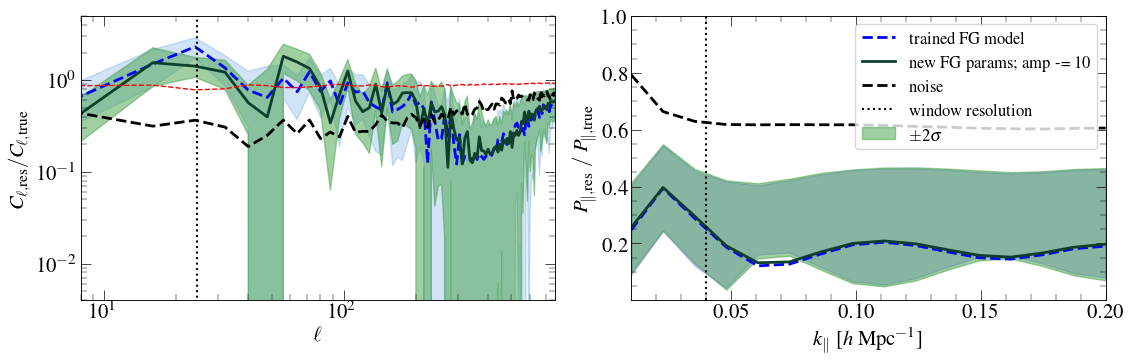

In [116]:
# MAKE RESIDUAL POWER SPECTRUM PLOT

# choose frequency index
pick = 2

# BUILD FIGURE  
plt.style.use('default')
latexify(fig_width=11.5, fig_height=3.8)
plt.style.use('./MNRAS_Style.mplstyle')
colors = [get_color(i) for i in ["purple", "green", "blue", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]

fig,axs = plt.subplots(1,2)        
ax = axs[0]



# NEW params
cosmo_spec_new = noise_Cl_new_arr[0]
noise_res_new = noise_Cl_new_arr[2]#[pick]
# residual Cls
res_new = (np.average(np.abs(np.array(pred_Cl_new_arr) - cosmo_spec_new), axis=0, weights=w_logp_new)[1][pick] / cosmo_spec_new[pick])[::8]
res_norm = [(np.abs(m - cosmo_spec_new) / cosmo_spec_new) for m in pred_Cl_new_arr]
sig_res_new = weighted_std(res_norm, weights=np.array(w_logp_new), axis=0)[1][pick][::8]

# predicted Cls
pred_new = np.average(np.array(pred_Cl_new_arr), axis=0, weights=w_logp_new)[1][pick]
sig_pred_new = weighted_std(np.array(pred_Cl_new_arr), weights=np.array(w_logp_new), axis=0)[1][pick]



# old params
cosmo_spec_old = noise_Cl_old_arr[0]
noise_res_old = noise_Cl_old_arr[2]


# residual Cls
res_old = (np.average(np.abs(np.array(pred_Cl_old_arr) - cosmo_spec_old), axis=0, weights=w_logp_old)[1][pick] / cosmo_spec_old[pick])[::8]
res_norm = [np.abs(m - cosmo_spec_old) / cosmo_spec_old for m in pred_Cl_old_arr]
sig_res_old = weighted_std(res_norm, weights=np.array(w_logp_old), axis=0)[1][pick][::8]

# predicted Cls
pred_old = np.average(np.array(pred_Cl_old_arr), axis=0, weights=w_logp_old)[1][pick][::8]
sig_pred_old = weighted_std(np.array(pred_Cl_old_arr), weights=np.array(w_logp_old), axis=0)[1][pick][::8]

# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')


# OLD params
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          res_old + 2*sig_res_old, 
          res_old - 2*sig_res_old, 
          color=colors[2], alpha=0.2)

ax.plot(np.arange(767)[::8], 
        res_old, c='blue', linestyle='--',
        linewidth=2, label=r'old params')


# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')

##### NEW params #####
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          res_new + 2*sig_res_new, 
          res_new - 2*sig_res_new, 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(np.arange(767)[::8], 
        res_new, c='#0D3F2B', 
        linewidth=2, label=r'new params amp -= 10%')

ax.plot(np.arange(767)[::8], 
        noise_res_new[pick][::8] / cosmo_spec_new[pick][::8], c='k', 
        linestyle='--',linewidth=2, label=r'noise')


# plot pca comparison
ax.plot(np.arange(767)[::8], 
        np.abs(pca6_Cl_new_arr[1] - cosmo_spec_new)[pick][::8] / cosmo_spec_new[pick][::8], c='red', 
        linestyle='--',linewidth=1, label=r'PCA-6')


# plot resolution of UNet window
ax.plot(np.ones(100)*(np.pi/hp.pixelfunc.nside2resol(8)), 
        np.linspace(1e-9, 10, num=100), c='k', linestyle=':', label='window resolution')


ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$C_{\ell,{\rm res}}/C_{\ell,{\rm true}}$")
ax.set_ylim(4e-3, 5)


##### Radial power spectrum #####

ax = axs[1]

## Old params
ax.fill_between(k_para,
          np.abs(nn_old_pka_mean[1] + 2*nn_old_pka_std[1] - cosmo_old_pka) / cosmo_old_pka,
          np.abs(nn_old_pka_mean[1] - 2*nn_old_pka_std[1] - cosmo_old_pka) / cosmo_old_pka,
          color='blue', alpha=0.2)

ax.plot(k_para, 
        np.abs(nn_old_pka_mean[1] - cosmo_old_pka) / cosmo_old_pka, c='blue', linestyle='--',
        linewidth=2, label=r'trained FG model')


## New params
ax.fill_between(k_para,
          np.abs(nn_new_pka_mean[1] + 2*nn_new_pka_std[1] - cosmo_new_pka) / cosmo_new_pka, 
          np.abs(nn_new_pka_mean[1] - 2*nn_new_pka_std[1] - cosmo_new_pka) / cosmo_new_pka, 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(k_para, 
        np.abs(nn_new_pka_mean[1] - cosmo_new_pka) / cosmo_new_pka, c='#0D3F2B', 
        linewidth=2, label=r'new FG params; amp -= 10%')

## noise spectrum

ax.plot(k_para, 
        np.abs(noise_new_pka - cosmo_new_pka) / cosmo_new_pka, c='k', 
        linestyle='--', linewidth=2, label=r'noise')

# plot nn window resolution
ax.plot(np.ones(100)*(0.04), 
        np.linspace(1e-3, 1e0, num=100), c='k', linestyle=':', label='window resolution')




#ax.set_ylim(1e-1, 2e0)
#ax.set_title(r'$\langle z \rangle = 2.5$', fontsize=15)
ax.set_ylabel(r"$P_{\parallel,\rm {res}}\ / \ P_{\parallel,\rm {true}} $")
ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
#ax.set_yscale('log')
ax.legend(fancybox=True, fontsize=12, loc='upper right')

    #plt.gcf().set_size_inches((1.25*3.37, 3.37))
plt.tight_layout()

# plt.rc('ytick', labelsize=15) 
# plt.rc('xtick', labelsize=15) 
#plt.suptitle('radial pka residual')


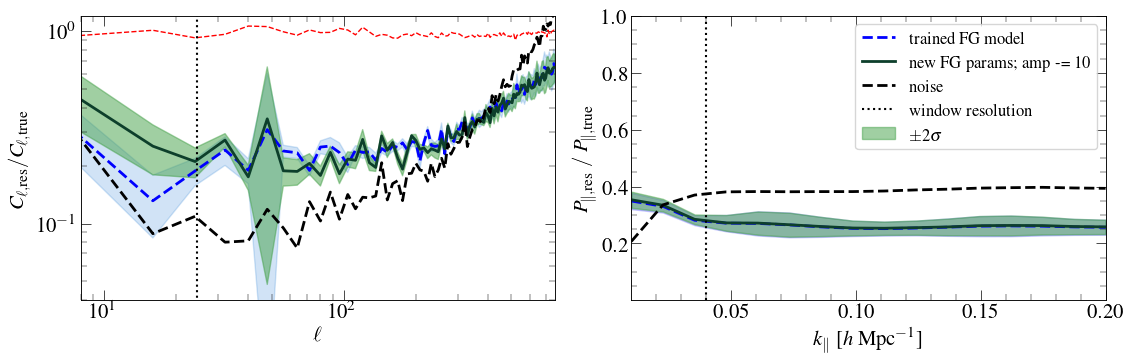

In [111]:
# MAKE RESIDUAL POWER SPECTRUM PLOT

# choose frequency index
pick = 2

# BUILD FIGURE  
plt.style.use('default')
latexify(fig_width=11.5, fig_height=3.8)
plt.style.use('./MNRAS_Style.mplstyle')
colors = [get_color(i) for i in ["purple", "green", "blue", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]

fig,axs = plt.subplots(1,2)        
ax = axs[0]



# NEW params
cosmo_spec_new = noise_Cl_new_arr[0]
noise_res_new = noise_Cl_new_arr[2]#[pick]
# residual Cls
res_new = (np.average(np.array(pred_Cl_new_arr), axis=0, weights=w_logp_new)[2][pick] / cosmo_spec_new[pick])[::8]
res_norm = [(m / cosmo_spec_new) for m in pred_Cl_new_arr]
sig_res_new = weighted_std(res_norm, weights=np.array(w_logp_new), axis=0)[2][pick][::8]

# predicted Cls
pred_new = np.average(np.array(pred_Cl_new_arr), axis=0, weights=w_logp_new)[1][pick]
sig_pred_new = weighted_std(np.array(pred_Cl_new_arr), weights=np.array(w_logp_new), axis=0)[1][pick]



# old params
cosmo_spec_old = noise_Cl_old_arr[0]
noise_res_old = noise_Cl_old_arr[2]


# residual Cls
res_old = (np.average(np.array(pred_Cl_old_arr), axis=0, weights=w_logp_old)[2][pick] / cosmo_spec_old[pick])[::8]
res_norm = [(m / cosmo_spec_old) for m in pred_Cl_old_arr]
sig_res_old = weighted_std(res_norm, weights=np.array(w_logp_old), axis=0)[2][pick][::8]

# predicted Cls
pred_old = np.average(np.array(pred_Cl_old_arr), axis=0, weights=w_logp_old)[1][pick][::8]
sig_pred_old = weighted_std(np.array(pred_Cl_old_arr), weights=np.array(w_logp_old), axis=0)[1][pick][::8]

# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')


# OLD params
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          res_old + 2*sig_res_old, 
          res_old - 2*sig_res_old, 
          color=colors[2], alpha=0.2)

ax.plot(np.arange(767)[::8], 
        res_old, c='blue', linestyle='--',
        linewidth=2, label=r'old params')


# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')

##### NEW params #####
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          res_new + 2*sig_res_new, 
          res_new - 2*sig_res_new, 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(np.arange(767)[::8], 
        res_new, c='#0D3F2B', 
        linewidth=2, label=r'new params amp -= 10%')

ax.plot(np.arange(767)[::8], 
        noise_res_new[pick][::8] / cosmo_spec_new[pick][::8], c='k', 
        linestyle='--',linewidth=2, label=r'noise')


# plot pca comparison
ax.plot(np.arange(767)[::8], 
        pca6_Cl_new_arr[2][pick][::8] / cosmo_spec_new[pick][::8], c='red', 
        linestyle='--',linewidth=1, label=r'PCA-6')


# plot resolution of UNet window
ax.plot(np.ones(100)*(np.pi/hp.pixelfunc.nside2resol(8)), 
        np.linspace(1e-9, 10, num=100), c='k', linestyle=':', label='window resolution')


ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$C_{\ell,{\rm res}}/C_{\ell,{\rm true}}$")
ax.set_ylim(4e-2, 1.2)


##### Radial power spectrum #####

ax = axs[1]

## Old params
ax.fill_between(k_para,
          (res_old_pka_mean[1] + 2*res_old_pka_std[1]) / cosmo_new_pka, 
          (res_old_pka_mean[1] - 2*res_old_pka_std[1]) / cosmo_new_pka, 
          color='blue', alpha=0.2)

ax.plot(k_para, 
        (res_old_pka_mean[1] / cosmo_new_pka), c='blue', linestyle='--',
        linewidth=2, label=r'trained FG model')


## New params
ax.fill_between(k_para,
          res_new_pka_mean[1] / cosmo_new_pka + 2*res_new_pka_std[1] / cosmo_new_pka, 
          res_new_pka_mean[1]/ cosmo_new_pka - 2*res_new_pka_std[1] / cosmo_new_pka, 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(k_para, 
        res_new_pka_mean[1] / cosmo_new_pka, c='#0D3F2B', 
        linewidth=2, label=r'new FG params; amp -= 10%')

## noise spectrum

ax.plot(k_para, 
        noise_res_new_pka / cosmo_new_pka, c='k', 
        linestyle='--', linewidth=2, label=r'noise')

# plot nn window resolution
ax.plot(np.ones(100)*(0.04), 
        np.linspace(1e-3, 1e0, num=100), c='k', linestyle=':', label='window resolution')




#ax.set_ylim(1e-1, 2e0)
#ax.set_title(r'$\langle z \rangle = 2.5$', fontsize=15)
ax.set_ylabel(r"$P_{\parallel,\rm {res}}\ / \ P_{\parallel,\rm {true}} $")
ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
#ax.set_yscale('log')
ax.legend(fancybox=True, fontsize=12, loc='upper right')

    #plt.gcf().set_size_inches((1.25*3.37, 3.37))
plt.tight_layout()

# plt.rc('ytick', labelsize=15) 
# plt.rc('xtick', labelsize=15) 
#plt.suptitle('radial pka residual')


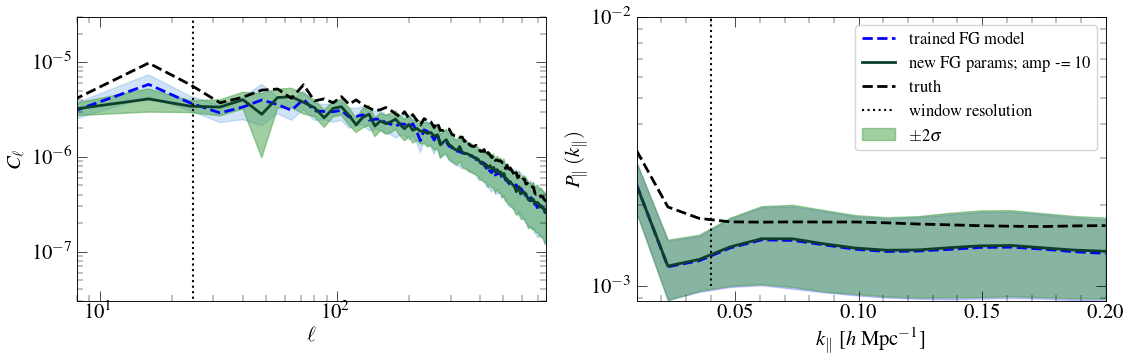

In [96]:
# choose frequency index
pick = 2

# BUILD FIGURE  
plt.style.use('default')
latexify(fig_width=11.5, fig_height=3.8)
plt.style.use('./MNRAS_Style.mplstyle')
colors = [get_color(i) for i in ["purple", "green", "blue", "red", "purple", "yellow", "grey", "lblue", "magenta", "green", "brown", "black", "orange"]]

fig,axs = plt.subplots(1,2)        
ax = axs[0]



# NEW params
cosmo_spec_new = noise_Cl_new_arr[0]
noise_res_new = noise_Cl_new_arr[2]#[pick]
# residual Cls
res_new = (np.average(np.array(pred_Cl_new_arr), axis=0, weights=w_logp_new)[2][pick])[::8]
res_norm = [(m) for m in pred_Cl_new_arr]
sig_res_new = weighted_std(res_norm, weights=np.array(w_logp_new), axis=0)[2][pick][::8]

# predicted Cls
pred_new = np.average(np.array(pred_Cl_new_arr), axis=0, weights=w_logp_new)[1][pick]
sig_pred_new = weighted_std(np.array(pred_Cl_new_arr), weights=np.array(w_logp_new), axis=0)[1][pick]



# old params
cosmo_spec_old = noise_Cl_old_arr[0]
noise_res_old = noise_Cl_old_arr[2]


# residual Cls
res_old = (np.average(np.array(pred_Cl_old_arr), axis=0, weights=w_logp_old)[2][pick])[::8]
res_norm = [(m) for m in pred_Cl_old_arr]
sig_res_old = weighted_std(res_norm, weights=np.array(w_logp_old), axis=0)[2][pick][::8]

# predicted Cls
pred_old = np.average(np.array(pred_Cl_old_arr), axis=0, weights=w_logp_old)[1][pick]
sig_pred_old = weighted_std(np.array(pred_Cl_old_arr), weights=np.array(w_logp_old), axis=0)[1][pick]

# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')


# OLD params
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          (pred_old + 2*sig_pred_old)[::8], 
          (pred_old - 2*sig_pred_old)[::8], 
          color=colors[2], alpha=0.2)

ax.plot(np.arange(767)[::8], 
        pred_old[::8], c='blue', linestyle='--',
        linewidth=2, label=r'old params')


# ax.plot(np.arange(767)[::8], 
#         noise_res_old[pick][::8] / cosmo_spec_old[pick][::8], c='k', 
#         linewidth=2, label=r'noise')

##### NEW params #####
# plot average UNet power spectrum with +/- 2sig credibility
ax.fill_between(np.arange(767)[::8],
          (pred_new + 2*sig_pred_new)[::8], 
          (pred_new - 2*sig_pred_new)[::8], 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(np.arange(767)[::8], 
        pred_new[::8], c='#0D3F2B', 
        linewidth=2, label=r'new params amp -= 10%')

ax.plot(np.arange(767)[::8], 
        cosmo_spec_old[pick][::8], c='k', 
        linestyle='--',linewidth=2, label=r'noise')



# plot resolution of UNet window
ax.plot(np.ones(100)*(np.pi/hp.pixelfunc.nside2resol(8)), 
        np.linspace(1e-9, 10, num=100), c='k', linestyle=':', label='window resolution')

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$C_{\ell}$")
ax.set_ylim(3e-8, 3e-5)


##### Radial power spectrum #####

ax = axs[1]

## Old params
ax.fill_between(k_para,
          (nn_old_pka_mean[1] + 2*nn_old_pka_std[1]), 
          (nn_old_pka_mean[1] - 2*nn_old_pka_std[1]), 
          color='blue', alpha=0.2)

ax.plot(k_para, 
        (nn_old_pka_mean[1]), c='blue', linestyle='--',
        linewidth=2, label=r'trained FG model')


## New params
ax.fill_between(k_para,
          nn_new_pka_mean[1] + 2*nn_new_pka_std[1], 
          nn_new_pka_mean[1] - 2*nn_new_pka_std[1], 
          color=colors[1], alpha=0.5, label=r'$\pm 2\sigma$')

ax.plot(k_para, 
        nn_new_pka_mean[1], c='#0D3F2B', 
        linewidth=2, label=r'new FG params; amp -= 10%')

## noise spectrum

ax.plot(k_para, 
        cosmo_new_pka, c='k', 
        linestyle='--', linewidth=2, label=r'truth')

# plot nn window resolution
ax.plot(np.ones(100)*(0.04), 
        np.linspace(1e-3, 1e-2, num=100), c='k', linestyle=':', label='window resolution')


#ax.set_ylim(1e-1, 2e0)
#ax.set_title(r'$\langle z \rangle = 2.5$', fontsize=15)
ax.set_ylabel(r"$P_{\parallel}\ (k_{\parallel}) $")
ax.set_xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')
ax.set_yscale('log')
ax.legend(fancybox=True, fontsize=12, loc='upper right')

    #plt.gcf().set_size_inches((1.25*3.37, 3.37))
plt.tight_layout()

# plt.rc('ytick', labelsize=15) 
# plt.rc('xtick', labelsize=15) 
#plt.suptitle('radial pka residual')


In [67]:
noise_new_pka

array([0.00066101, 0.00066104, 0.00066101, 0.00066085, 0.00066103,
       0.00066138, 0.00066144, 0.00066187, 0.00066058, 0.00066032,
       0.00066017, 0.00066146, 0.00066115, 0.00066142, 0.00066139,
       0.00066093])

In [112]:
res_old_pka_std.shape

(2, 16)

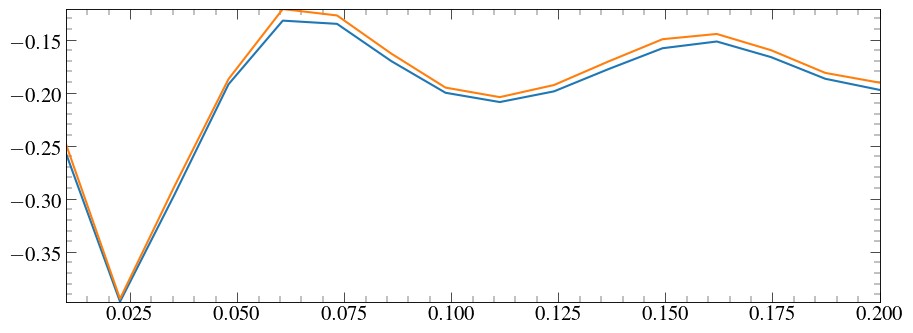

In [104]:
plt.plot(k_para, (nn_new_pka_mean[1] - cosmo_new_pka)/ cosmo_new_pka)
plt.plot(k_para, (nn_old_pka_mean[1] - cosmo_old_pka)/ cosmo_old_pka)

In [139]:
nn_old_pka = radialPka(nn_pred_avg_old, n_nu=32)

In [140]:
cosmo_old_pka = radialPka(cosmo_avg_old, n_nu=32)

In [145]:
res_pka_old = radialPka((nn_pred_avg_old - cosmo_avg_old), n_nu=32)
res_pka_new = radialPka((nn_pred_avg_new - cosmo_avg_new), n_nu=32)

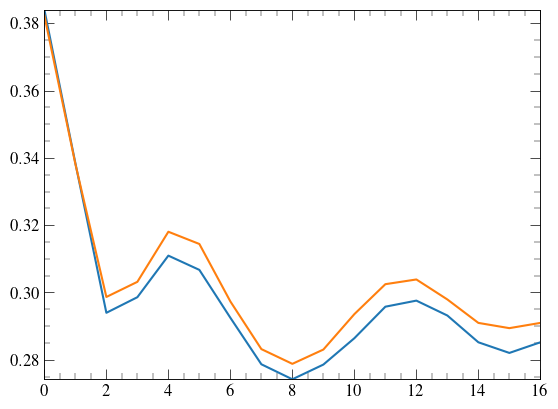

In [146]:
plt.plot(((res_pka_new) / cosmo_new_pka)[:17])
plt.plot(((res_pka_old)[:17]) / cosmo_old_pka[:17])

#plt.plot(nn_pka[:17])

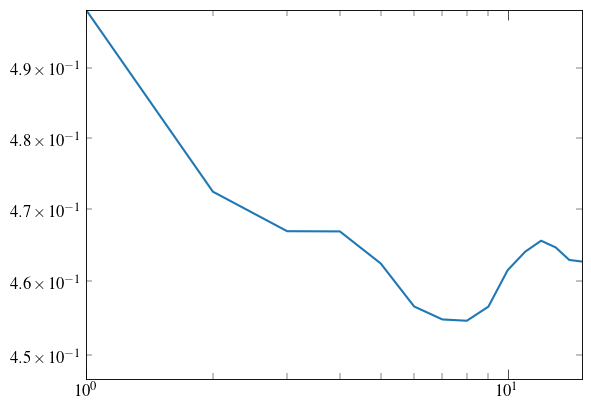

In [112]:
plt.plot(np.abs(res_pka[:16]) / cosmo_pka[:16])
plt.yscale('log')
plt.xscale('log')

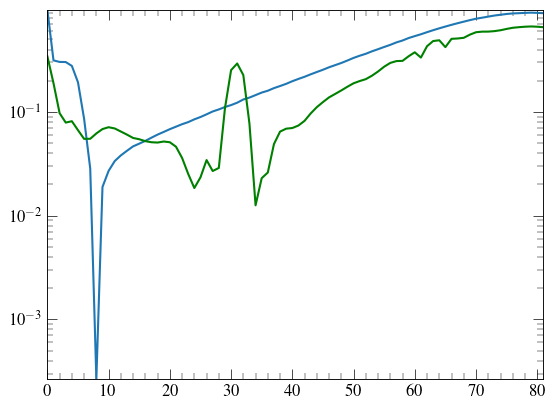

In [31]:
plt.plot(np.abs(pca_pka[:82] - cosmo_pka[:82]) / cosmo_pka[:82])
plt.plot(np.abs(nn_pka_bao[:82] - cosmo_pka[:82]) / cosmo_pka[:82], color='green')
plt.yscale('log')

In [103]:
pca6_pka_bao = radialPka(pca6_bao, n_nu=32)
pca3_pka_bao = radialPka(pca3_bao, n_nu=32)

In [104]:
pca6_pka_smooth = radialPka(pca6_smooth, n_nu=32)
pca3_pka_smooth = radialPka(pca3_smooth, n_nu=32)
nn_pka_smooth = radialPka(nn_pred_smooth, n_nu=32)

In [13]:
from nbodykit.lab import *
from nbodykit import style
from scipy.interpolate import InterpolatedUnivariateSpline as spline

In [14]:
redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
BoxSize = 1380.
Nmesh = 256

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=BoxSize, Nmesh=Nmesh, bias=2.0, seed=42)

In [16]:
mesh = cat.to_mesh(window='tsc', Nmesh=512, compensated=True)

/mnt/home/tmakinen/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  """Entry point for launching an IPython kernel.


In [18]:
# compute the 1D power of this mesh
r = FFTPower(mesh, mode='1d')

# create a smooth interpolation
truth = r.power
truth = spline(truth['k'], truth['power'].real - truth.attrs['shotnoise'])

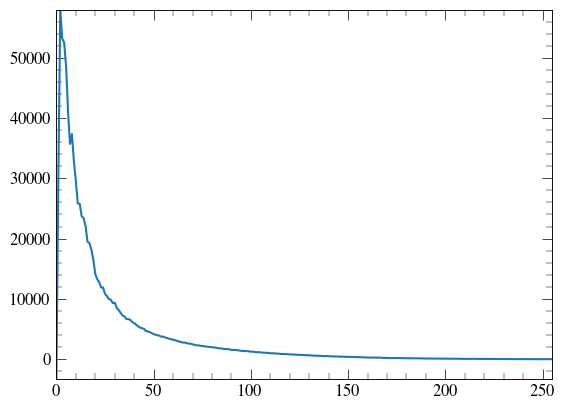

In [23]:
plt.plot(truth(r.power['k']))

In [24]:
k_para = np.linspace(0.01, 0.2, num=160)
plt.plot(np.mean(np.array_split(cosmo_pka[:], 5), axis=0)[1:])# / np.mean(np.array_split(cosmo_smooth_pka[:], 2), axis=0)[1:])
plt.plot(np.mean(np.array_split(nn_pka_bao[:], 5), axis=0)[1:])# / np.mean(np.array_split(cosmo_smooth_pka[:], 2), axis=0)[1:])

plt.ylabel(r'$P_\parallel(k_\parallel)\ \  [\rm mK^2\ $h$\ \rm Mpc^{-1}]$')
plt.xlabel(r'$k_\parallel\ $[$h$ Mpc$^{-1}$]')

NameError: name 'cosmo_pka' is not defined

In [114]:
nn_res_pka = radialPka((np.squeeze(nn_pred_bao) - cosmo1), n_nu=32)
pca6_res_pka = radialPka((np.squeeze(pca6_bao) - cosmo1), n_nu=32)

In [116]:
nn_res_pka

array([1.07020061, 0.71923439, 0.70452654, 0.5142449 , 0.51096392,
       0.39532242, 0.42297694, 0.34297633, 0.36915505, 0.32195024,
       0.33687301, 0.31283407, 0.31834515, 0.30798645, 0.30514266,
       0.30366843, 0.2957458 , 0.29964991, 0.28676275, 0.29645527,
       0.27999354, 0.29491266, 0.27497592, 0.29353092, 0.27172492,
       0.29358838, 0.26991934, 0.29416711, 0.26910444, 0.2950023 ,
       0.26955162, 0.39963645])

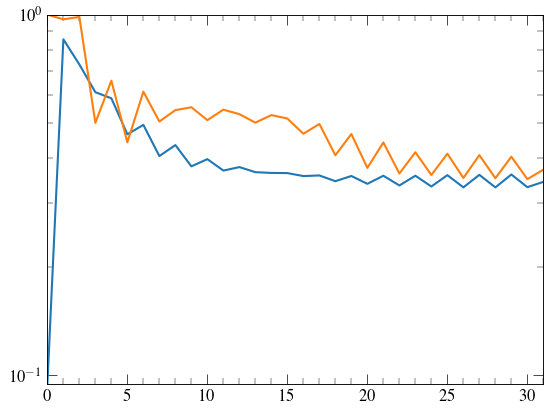

In [121]:
#plt.plot(nn_res_pka / cosmo_pka)
plt.plot(pca6_res_pka / cosmo_pka)
plt.yscale('log')

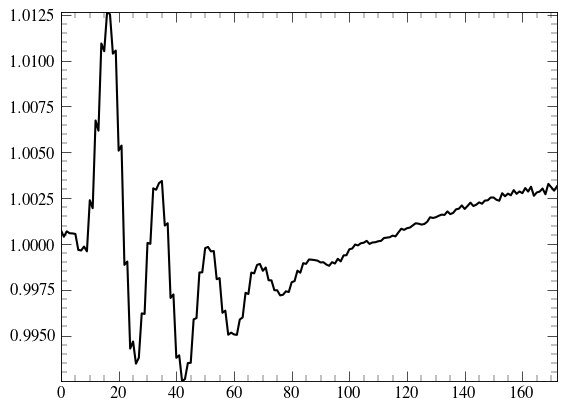

In [26]:
#plt.plot((nn_pka_bao / cosmo_smooth_pka)[1:])
plt.plot((cosmo_pka / cosmo_smooth_pka)[1:], color='k')

In [83]:
# combine two predictions
# nn_pka = np.empty(nn_pka1.size + nn_pka2.size)
# nn_pka[0::2] = nn_pka1
# nn_pka[1::2] = nn_pka2

# # combine cosmo
# cosmo_pka = np.empty(cosmo_pka1.size + cosmo_pka2.size)
# cosmo_pka[0::2] = cosmo_pka1
# cosmo_pka[1::2] = cosmo_pka2

# cosmo_smooth_pka = np.empty(cosmo_smooth_pka1.size + cosmo_smooth_pka2.size)
# cosmo_smooth_pka[0::2] = cosmo_smooth_pka1
# cosmo_smooth_pka[1::2] = cosmo_smooth_pka2

In [57]:
np.mean((np.squeeze(nn_pred1) - cosmo1)**2)

NameError: name 'nn_pred1' is not defined

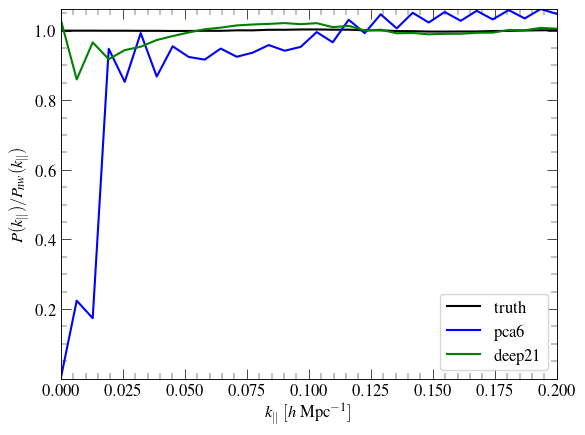

In [107]:
k_para = np.linspace(0, 0.2, 32)
plt.plot(k_para, cosmo_pka / cosmo_smooth_pka, color='k', label='truth')
#plt.plot(k_para, pca3_pka_bao / cosmo_smooth_pka, color='r')
plt.plot(k_para, pca6_pka_bao /  cosmo_smooth_pka, color='b', label='pca6')
plt.plot(k_para, nn_pka_bao /  cosmo_smooth_pka, color='g', label='deep21')

plt.ylabel(r'$P(k_\parallel) / P_{nw}(k_\parallel)$')
plt.xlabel(r'$k_\parallel\ [h\ \rm Mpc ^{-1}]$')

plt.legend()
#plt.yscale('log')
#plt.ylim(0.95, 1.05)

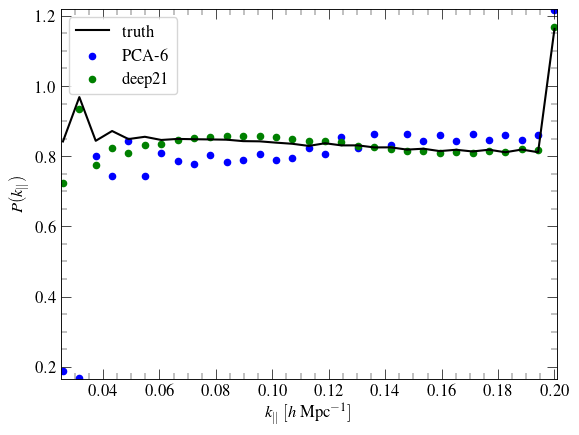

In [108]:
k_para = np.linspace(0.02, 0.2, 32)

#plt.scatter(k_para, (cosmo_pka1 / 1), s=15, marker='+', color='k', label='truth')
plt.plot(k_para[1:], (cosmo_pka / 1)[1:],  color='k', label='truth')

plt.scatter(k_para[1:], (pca6_pka_bao / 1)[1:], s=20, color='b', label='PCA-6')
#plt.scatter(k_para, pca3_pka / cosmo_smooth_pka1, color='purple', label='PCA-3')

plt.scatter(k_para[1:], (nn_pka_bao / 1)[1:],s=20, color='g', label='deep21')
#plt.ylabel(r'$P(k_\parallel) / P_{nw}(k_\parallel)$')
plt.ylabel(r'$P(k_\parallel) $')
plt.xlabel(r'$k_\parallel\ [h\ \rm Mpc ^{-1}]$')
#plt.ylim(0.97, 1.03)
#plt.yscale('log')
plt.legend(loc='best')

In [108]:
np.mean((np.squeeze(nn_pred1) - cosmo1)**2)

0.012629118974478252

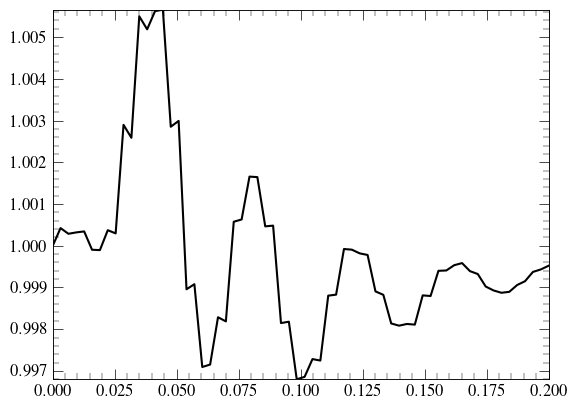

In [57]:

#plt.plot(k_para, pca_pka / cosmo_smooth_pka, color='r')
#plt.ylim(0.95, 1.05)

In [8]:
# compare foreground distributions for different simulation parameters
fg_old = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/test/obs_sim091.npy')
fg_new = np.load('/mnt/home/tmakinen/ceph/pca_ska/avg/amp_test/obs_plus_sim005.npy')

In [9]:
(bn,nu_bot,nu_top,z_bot,z_top) = np.loadtxt('nuTable.txt').T
nu_arr = ((nu_bot + nu_top)/2.)[:-1]
N_NU = 32
nu_arr = nu_arr[:N_NU*5]
nu_arr = np.array([np.mean(i,axis=0) for i in np.split(nu_arr,N_NU)])

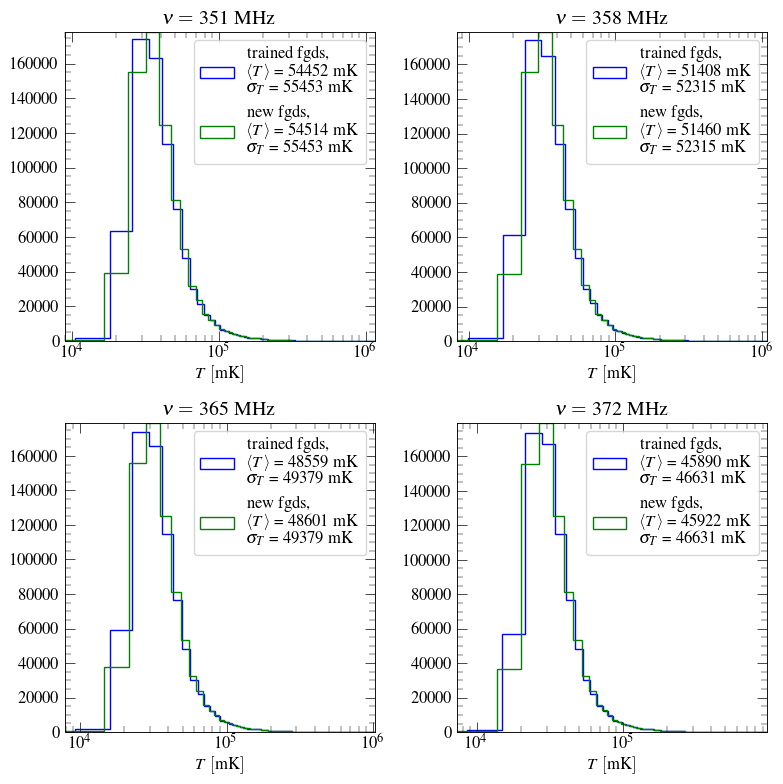

In [10]:
picks = np.arange(len(nu_arr))[::2]
fig = plt.figure(figsize=(8, 8))
for nu in range(4):
    plt.subplot(2,2,nu+1)
    nu = picks[nu]
    
        
    # compute mean and std:
    old_mean = np.mean(fg_old.T[nu].T.flatten())
    old_std = np.std(fg_old.T[nu].T.flatten())
    
    new_mean = np.mean(fg_new.T[nu].T.flatten())
    new_std = np.std(fg_old.T[nu].T.flatten())
    
    
    plt.hist(fg_old.T[nu].T.flatten(), 
             color='blue', histtype='step', 
             bins=150, label='trained fgds, \n $ \langle T \\rangle $ = %03d mK \n $\sigma_T$ = %03d mK'%(old_mean, old_std))
    plt.hist(fg_new.T[nu].T.flatten(), color='green', histtype='step', 
             bins=150, label='new fgds, \n $ \langle T \\rangle $ = %03d mK \n $\sigma_T$ = %03d mK'%(new_mean, new_std))
    

    
    plt.xlabel(r'$T\ [ \rm mK]$')
    plt.xscale('log')
    plt.title(r'$\nu =$ %03d MHz'%(nu_arr[nu]))
    plt.legend()
plt.tight_layout()
plt.show()